# ASTR 19 Group Project Solution

#### Foreword:<br>
This notebook contains one solution to the group project, using exclusively what we learned in class, and nothing more. The purpose of this project was to show you the journey of a researcher from some observational data to a meaningful and significant measurement.


#### Instructions:

1) Download the dataset: go to the <a href="https://exoplanetarchive.ipac.caltech.edu/"NASA Exoplanet Archive</a> and find the 55 Cnc system overview by typing "55 Cnc" into the Explore the Archive searchbar. Scroll down until you see "Ancillary Information" and download the "Radial Velocity Curve" that has 274 points. This will open a new tab with plain text, that you can save in a text file.

2) In your Jupyter notebook, load the data: time, radial velocity (RV), and experimental uncertainty on the RV data ; and plot this data. Save this figure as a PDF.

3) Define an oscillatory function in Python to describe the variations of the radial velocity data. Using the scipy library, fit the oscillatory function to the data, accounting for the uncertainty. Document these steps in the Jupyter notebook, and graph both the model and the data on the same plot. Provide sufficient labeling of data and the axes to provide clarity, and have the notebook save the figure to a PDF.

4) Next, subtract the best fit function from the data to obtain residuals, and plot them. Assess graphically and mathematically deviations of the measured RV signal from the model. Plot a histogram of the residuals and measure their standard deviation. Is the scatter in the residuals larger than the assumed experimental error? Save the histogram as a PDF using our histogram best practices, including labeling of the data, axis labels, and "reasonable" bin widths as demonstrated in class.

5) When multiple planets are orbiting around the star, the "wobbles" from each individual planets are simply summed. Repeat steps 3 and 4 to find a second planet in the RV data. Can you find more than 2 exoplanets in the RV data?

6) For a planet on a circular orbit and zero inclination, the mass of the exoplanet is given by: $M_{\mathrm{exoplanet}} = \left(\frac{K}{28.4 ~\text{m/s}}\right) \left(\frac{P}{365~\text{days}}\right)^{1/3} \left(M_{\star}\right)^{2/3}$
where $K$ is the amplitude of the RV signal (in m/s), $P$ is the period of the planet (in days), $M_{\star}$ is the mass of the star in units of the mass of the Sun, and $M_{\mathrm{exoplanet}}$ is obtained in Jupiter masses. Use the amplitudes K and periods P obtained by your fit to calculate the mass of the exoplanets found in the RV data. Using information from the <a href="https://exoplanetarchive.ipac.caltech.edu/"NASA Exoplanet Archive</a>, determine which exoplanet(s) you discovered.

### First import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 

# Modeling the Radial Velocity Data

### Read in data

First, read in the RV data and plot it.

In [2]:
### Read in the data

# define the file name
# the file contains a copy-paste of the data obtained from the catalog
file = "rv_55cnc.txt"

# read the data from the file using "numpy.loadtxt"
# all the lines starting with '\\' or '|' are treated as comments
data = np.loadtxt(file,comments=['\\', '|'])

# extract the data into individual arrays
time_ut = data[:,0]
rv = data[:,1]
rv_err = data[:,2]

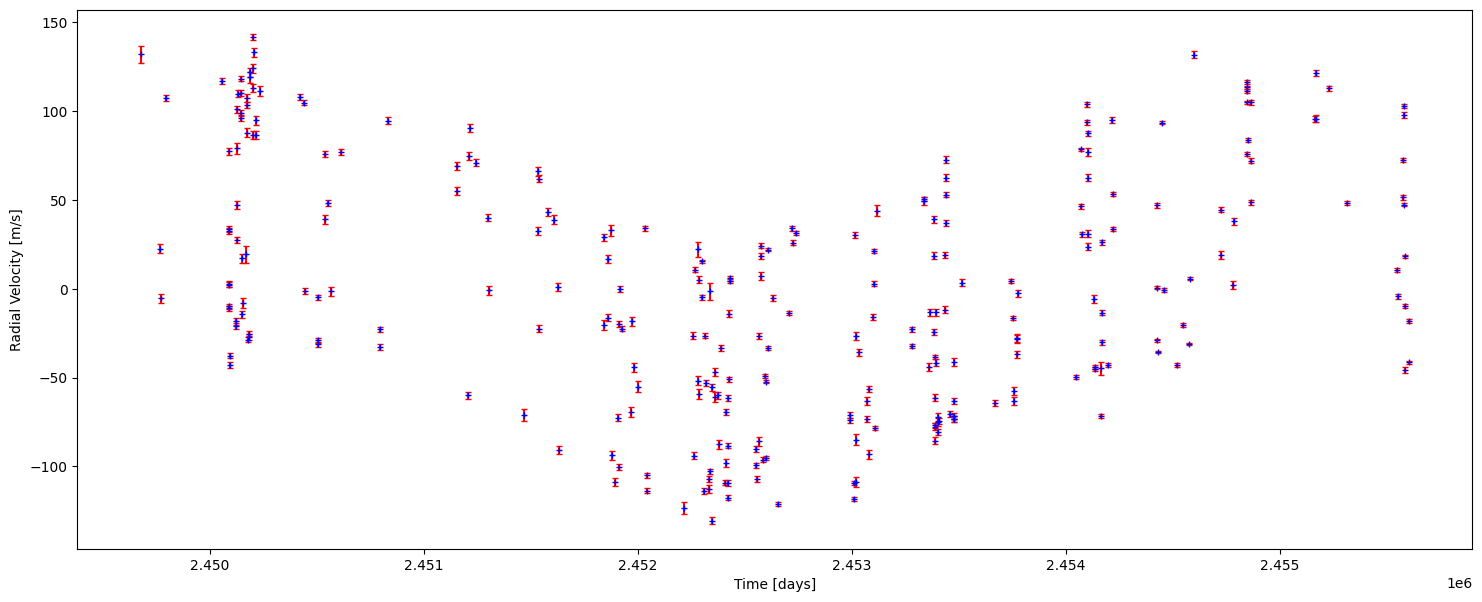

In [3]:
# plotting the data
fig,ax = plt.subplots(figsize=(18,7))

# our data is (x,y) coordinates, with uncertainty on the y values,
# so we are using plt.errorbar
ax.errorbar(time_ut,rv,yerr=rv_err,
            ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity [m/s]")

plt.show()

We can verify that we have the right number of points:

In [4]:
print(len(time_ut),len(rv),len(rv_err))

274 274 274


The time axis is kind of weird: we see a bunch of very large numbers. This is because in astronomy, time is counted as Universal Time (UT), which is the number of days since 22 October 1884. We don't really need this, so we can rewrite time in a way where the first point is time=0. This will look so much better!

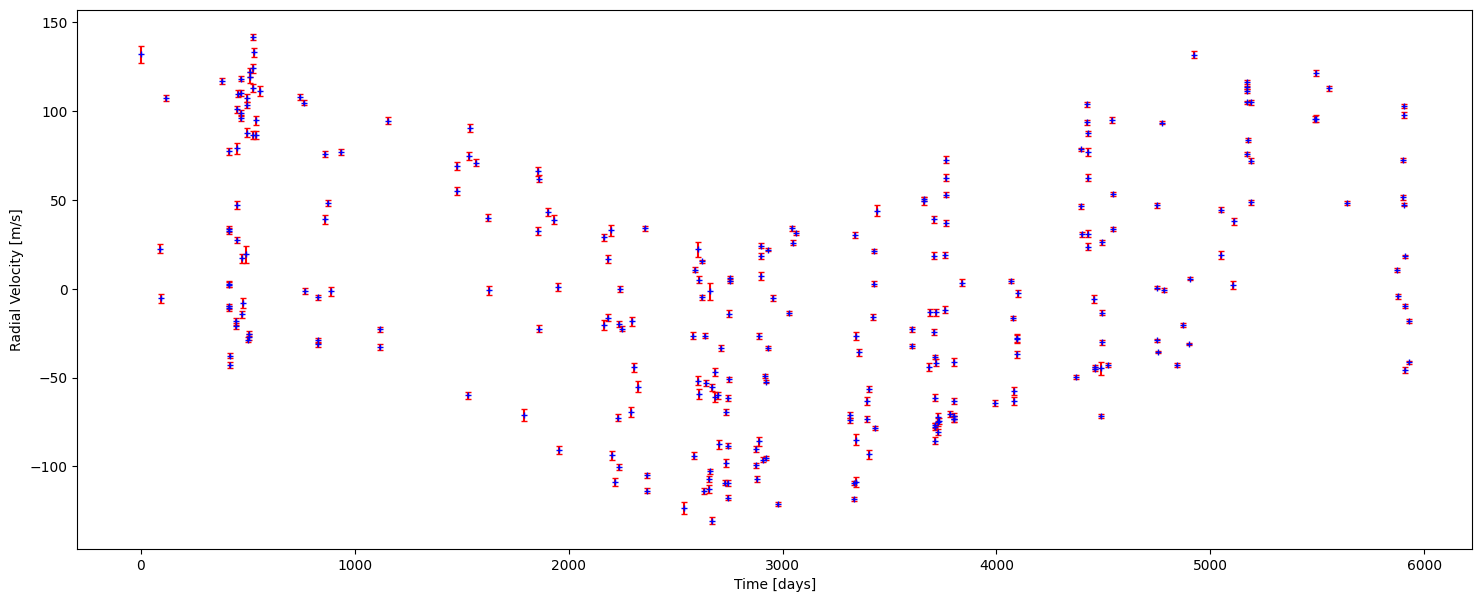

In [5]:
# re-define time
time = time_ut - time_ut[0]

# plot again with the new time
fig,ax = plt.subplots(figsize=(18,7))

ax.errorbar(time,rv,rv_err,
            ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity [m/s]")

plt.show()

## 1 planet analysis

No time to loose. The data clearly looks like a sine function. Let's define a sine wave and fit our data with it!

In [6]:
# model with 1 planet
def rv_model1(time, offset, A1, P1, T1):

    rv = A1*np.sin(2.0*np.pi*(time-T1)/P1) + offset
    
    return rv

We already know from Lecture 10 that a fit to a sine wave doesn't always work as intended. It helps the curve_fit algorithm a lot if we 1) provide an initial guess that is as close as possible to the expected solution and 2) specify reasonnable boundaries so that the fitting algorithm avoids trying strange/unexpected/crazy values. Let's provide an initial guess and boundaries to each parameter based on what we see on the figure:
- amplitude: the total amplitude is about 100 m/s, and keep boundaries large but positive to avoid negative amplitudes (10 -- 500)
- period: we can visually tell that the time between two peaks is about 4000 days, and it's definitely between 3000 and 5000
- start: the midpoint between lowest and highest value, somewhere around 4000 days, plus/minus 1000 (if you don't understand this one, take a look again at the script "sine_wave_visualisation.py", and if you don't have any guesses you can just try different values until it works)
- offset: the average value of the data seems to be close to 0 m/s, but let us give it some wiggle room (-50 to 50)

In [7]:
# initial guesses
A1 = 100.0
P1 = 5000.0
T1 = 4000.0 
offset = 0

# array containing initial guesses
p_init = np.asarray([offset,A1,P1,T1])

# set upper and lower boundaries on the search
lower = np.array([-50, 10,3000,3000])
upper = np.array([ 50,500,5000,5000])

# perform the fit with 1 planet
params1, params_cov1 = optimize.curve_fit(rv_model1,time,rv,sigma=rv_err,p0=p_init,bounds=(lower,upper),maxfev=100000)

# get parameters uncertainty
param_err1 = np.sqrt(np.diag(params_cov1))

# print results
print(f"Offset : {params1[0]:.2f} ft (+/- {param_err1[0]:.5f})")
print()
print(f"Amplitude A1: {params1[1]:.2f} m/s (+/- {param_err1[1]:.5f})")
print(f"Period P1: {params1[2]:.2f} days (+/- {param_err1[2]:.5f})")
print(f"T conj T1: {params1[3]:.2f} days (+/- {param_err1[3]:.5f})")

Offset : -1.42 ft (+/- 3.47650)

Amplitude A1: 47.92 m/s (+/- 4.17781)
Period P1: 4807.06 days (+/- 338.62521)
T conj T1: 4221.91 days (+/- 93.02509)


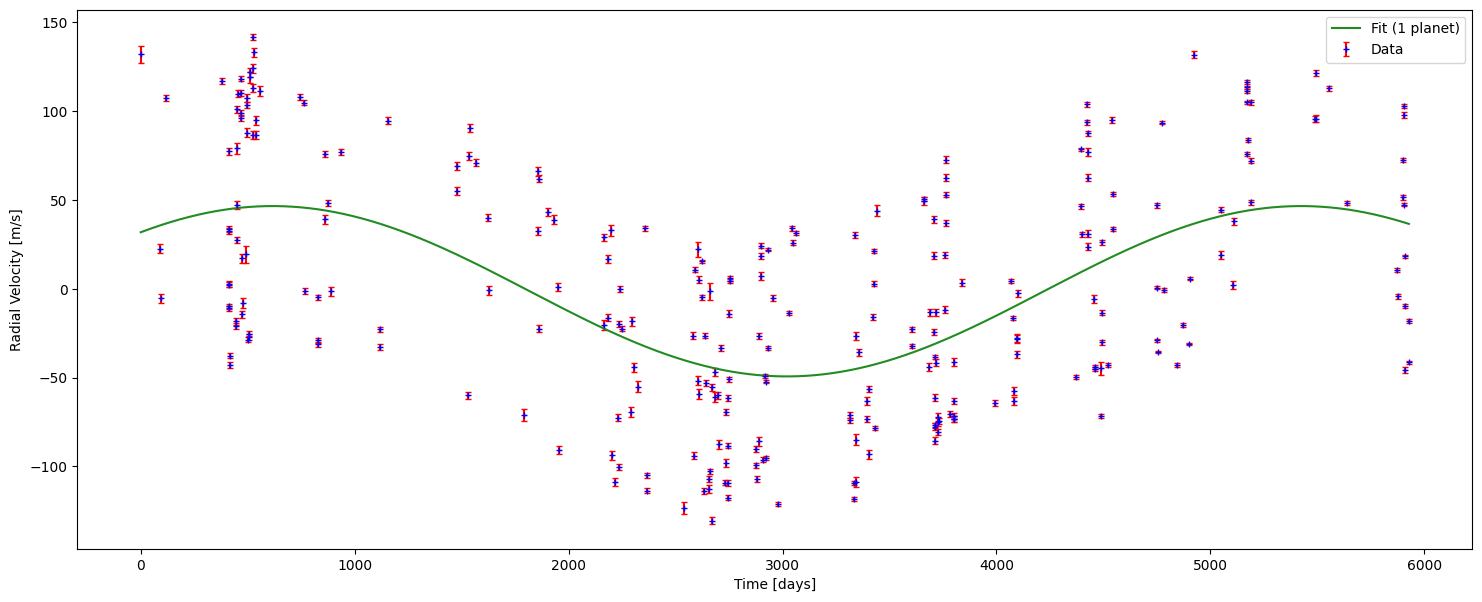

In [8]:
# plot data and 1 planet model
time_fit = np.linspace(np.min(time),np.max(time),10000)
rv_fit = rv_model1(time_fit,*params1)

fig,ax = plt.subplots(figsize=(18,7))

ax.errorbar(time,rv,rv_err,label="Data",
            ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')
ax.plot(time_fit,rv_fit,label="Fit (1 planet)",c="forestgreen")

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity [m/s]")
plt.legend()

plt.show()

The fit worked, and we can clearly tell visually that our model follows the trend of the data. Let us investigate the residuals.

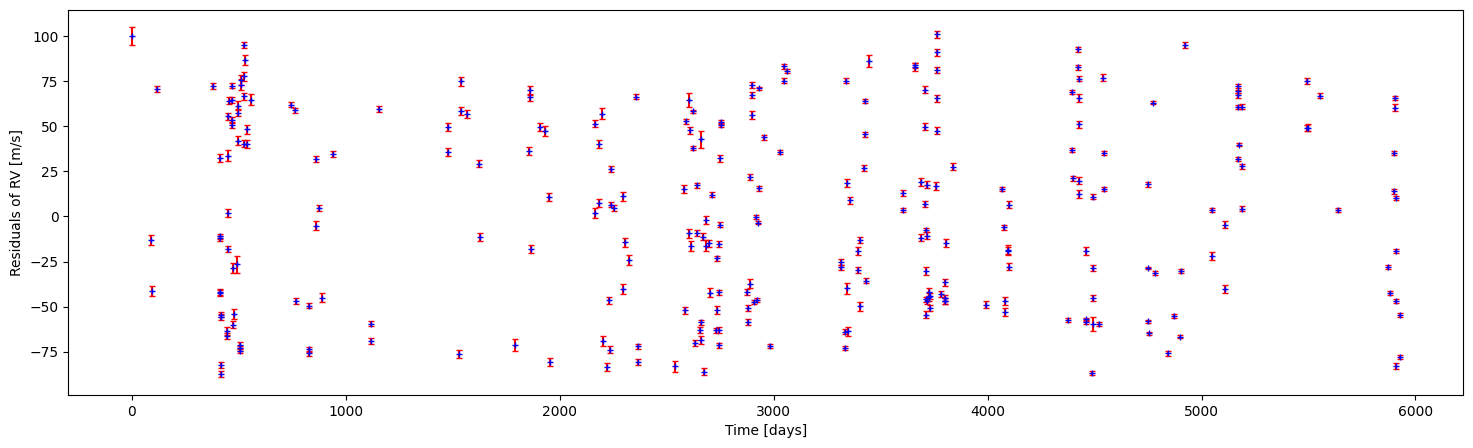

In [9]:
# evaluate the model at the measurement times
rv_model_points = rv_model1(time,*params1)

# get the residuals
residuals1 = rv - rv_model_points

#plot the residuals
fig,ax = plt.subplots(figsize=(18,5))

plt.errorbar(time,residuals1,rv_err,
             ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')

plt.xlabel("Time [days]")
plt.ylabel("Residuals of RV [m/s]")

plt.show()

In [10]:
print(f"Data stdev: {np.std(rv):.6f}")
print(f"Data uncertainty: {np.mean(rv_err):.6f}")
print(f"Residuals 1 stdev/rms: {np.std(residuals1):.6f}")

Data stdev: 67.066162
Data uncertainty: 1.806067
Residuals 1 stdev/rms: 52.212070


The stdev of residuals is significantly smaller than the stdev of data. This is good, because it means our model extracted information from the data. However, the residuals are still pretty big. There are other planets hiding in the data.

## Finding the second planet

Before doing a fit with 2 sine waves, we need to make sure where we are going. Because we will need to provide an initial guess and boundaries for the 2nd planet, we need to understand our data, and where we expect that planet to be.

When looking at the data, there is a swarm of points concentrated around 500 days. Let's take a look at that swarm.

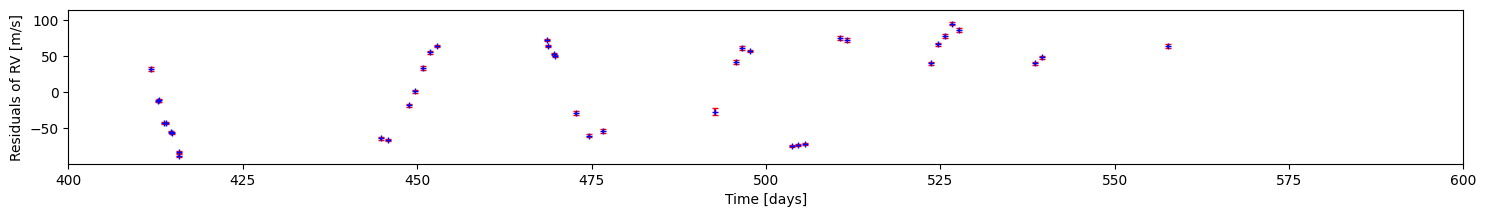

In [11]:
# plot the residuals, but zoom in from 400 to 600 days
fig,ax = plt.subplots(figsize=(18,2))

plt.errorbar(time,residuals1,rv_err,
             ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')

plt.xlabel("Time [days]")
plt.ylabel("Residuals of RV [m/s]")
plt.xlim(400,600)

plt.show()

It is not super duper obvious, but one can clearly see the pattern of points going up and down. This is the second planet. This is the data we are trying to fit.

We still don't know what are the properties of this second sine wave. If we try to fit all the data with 2 sine waves without an initial guess, it simply won't work. So let's extract these points (taking a slice) and do a fit only using these points.

Here, I am using a slice of 'residuals1', as it is intended to represent the data approximately without the contribution from the first planet.

In [12]:
# make a mask that only keeps points between 400 and 600 days
mask_400_to_600 = (time>400) & (time<600)

# take a slice corresponding to that mask
time_slice = time[mask_400_to_600]
rv_slice = residuals1[mask_400_to_600]
rv_err_slice = rv_err[mask_400_to_600]

In [13]:
# using a mask is a cleaner approach. a simpler way is to look which index
# corresponds to the first point after 400 days, and the last point before 600 days.
# the same data can be obtained with:
#time_slice = time[5:45]
#rv_slice = residuals1[5:45]
#rv_err_slice = rv_err[5:45]

print(time_slice)
print(time[5:45])

[411.81864 412.85574 412.94266 413.71317 413.92313 414.68192 414.82938
 415.78543 415.90653 444.80923 445.82546 448.79445 449.71463 450.77432
 451.78784 452.80412 468.64714 468.79037 469.5618  469.70145 472.82422
 474.68565 476.59961 492.68582 495.67639 496.62366 497.66165 503.67102
 504.62528 505.57059 510.67634 511.62316 523.61999 524.63784 525.62343
 526.62548 527.62452 538.62348 539.61037 557.62708]
[411.81864 412.85574 412.94266 413.71317 413.92313 414.68192 414.82938
 415.78543 415.90653 444.80923 445.82546 448.79445 449.71463 450.77432
 451.78784 452.80412 468.64714 468.79037 469.5618  469.70145 472.82422
 474.68565 476.59961 492.68582 495.67639 496.62366 497.66165 503.67102
 504.62528 505.57059 510.67634 511.62316 523.61999 524.63784 525.62343
 526.62548 527.62452 538.62348 539.61037 557.62708]


Do the 1-planet fit using an educated guess on initial guess and boundaries. It may take a few attempts to narrow it down, but it should take too much work to arrive to a good fit.

In [14]:
# initial guesses
A1_slice = 50.0
P1_slice = 15.0
T1_slice = 450.0 
offset_slice = 0

# array containing initial guesses
p_init_slice = np.asarray([offset_slice,A1_slice,P1_slice,T1_slice])

# set upper and lower boundaries on the search
lower_slice = np.array([-50, 10,10,400])
upper_slice = np.array([ 50,500,50,500])

# perform the fit with 1 planet
params1_slice, params_cov1_slice = optimize.curve_fit(rv_model1,time_slice,rv_slice,sigma=rv_err_slice,p0=p_init_slice,bounds=(lower_slice,upper_slice),maxfev=100000)

# get parameters uncertainty
param_err1_slice = np.sqrt(np.diag(params_cov1_slice))

# print results
print(f"Offset : {params1_slice[0]:.2f} ft (+/- {param_err1_slice[0]:.5f})")
print()
print(f"Amplitude A1: {params1_slice[1]:.2f} m/s (+/- {param_err1_slice[1]:.5f})")
print(f"Period P1: {params1_slice[2]:.2f} days (+/- {param_err1_slice[2]:.5f})")
print(f"T conj T1: {params1_slice[3]:.2f} days (+/- {param_err1_slice[3]:.5f})")

Offset : -0.11 ft (+/- 1.74185)

Amplitude A1: 75.60 m/s (+/- 1.94372)
Period P1: 14.69 days (+/- 0.02840)
T conj T1: 449.36 days (+/- 0.08204)


Did it work? Let's plot it.

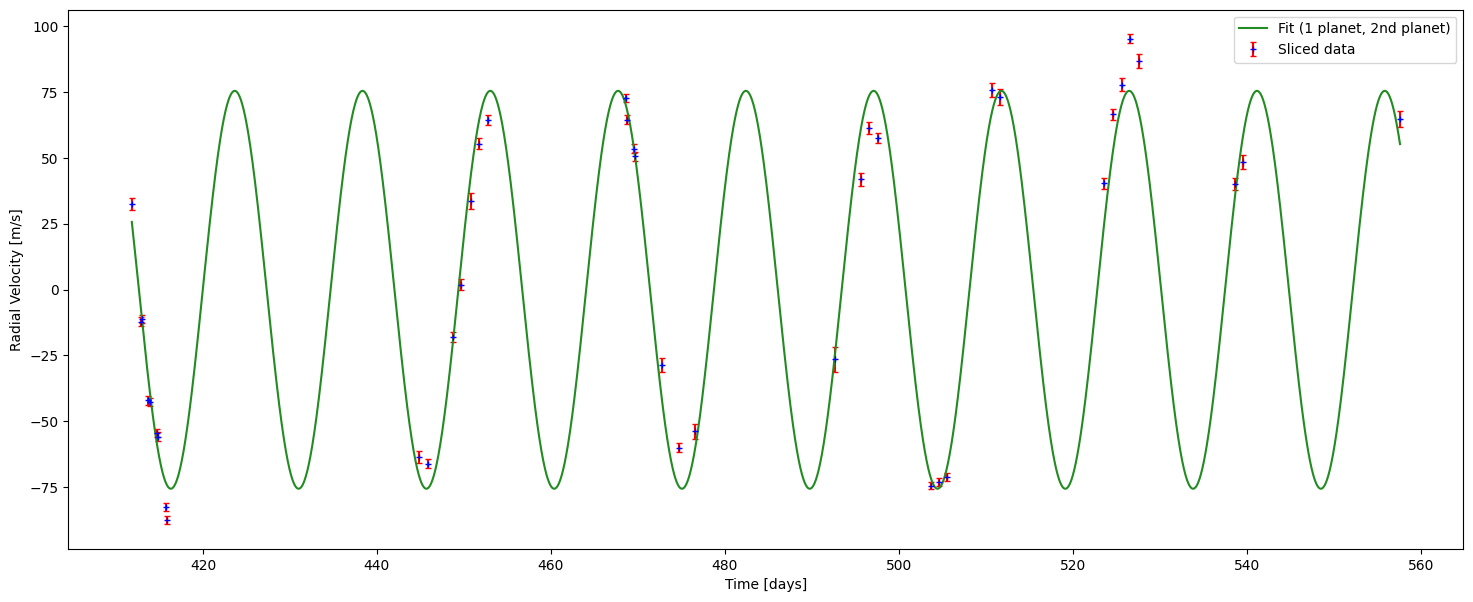

In [15]:
# plot slice of data and 1 planet model applied to the 2nd planet
time_fit = np.linspace(np.min(time_slice),np.max(time_slice),10000)
rv_fit = rv_model1(time_fit,*params1_slice)

fig,ax = plt.subplots(figsize=(18,7))

ax.errorbar(time_slice,rv_slice,rv_err_slice,label="Sliced data",
            ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')
ax.plot(time_fit,rv_fit,label="Fit (1 planet, 2nd planet)",c="forestgreen")

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity [m/s]")
plt.legend()

plt.show()

In the figure above, we see how great the correspondence is between the data and the model is. Even though the data is very sparse (big chuncks of missing data), the sampling is good enough so that the data is reproduced very well with this single sine wave.

Notice that this planet has a period of just 15 days, which is 320 faster than the period of the first planet. This means that in the full range of our data (~6000 days), the 2nd planet makes 400 oscillations. No wonder we couldn't see it!!!

<b style='color:red;'>At this point you have successfuly identified the 2nd planet and can measure its mass using the period and amplitude from the fit applied to the data slice. If proper justification is provided in the report, arriving at this point is sufficient to receive full credit (finding the 3rd planet is extra credit).</b>

## 2 planets analysis

We have confirmed the presence of a 2nd planet, and we even have an excellent estimate of its parameters (period and "start time"). Let's use these values in our 2-planet fit.

In [16]:
def rv_model2(time, offset, A1, P1, T1, A2, P2, T2):

    rv = A1*np.sin(2.0*np.pi*(time-T1)/P1) +\
         A2*np.sin(2.0*np.pi*(time-T2)/P2) + offset
    
    return rv 

### 2-planets fit: attempt 1

We already applied a 1-planet fit to the initial data sets, and a 1-planet fit to the sliced data. Let's use the values we obtained before as the initial guess, since these are optimized values. But let the fitting procedure some wiggle room to account for uncertainty in the parameters.

In [17]:
# make some initial guesses
# first planet
A1 = params1[1]
P1 = params1[2]
T1 = params1[3]
offset = params1[0]

# second planet
A2 = params1_slice[1]
P2 = params1_slice[2]
T2 = params1_slice[3]

#array containing initial guesses
p_in = np.asarray([offset,A1,P1,T1,A2,P2,T2])

# set upper and lower boundaries on the search
lower = np.array([-50, 10,3000,3000, 10,10,400])
upper = np.array([ 50,500,5000,5000,500,50,500])

#perform the fit
params2, params_cov2 = optimize.curve_fit(rv_model2,time,rv,sigma=rv_err,p0=p_in,bounds=(lower,upper),maxfev=100000)

#get parameters uncertainty
param_err2 = np.sqrt(np.diag(params_cov2))

print(f"Offset : {params2[0]:.2f} ft (+/- {param_err2[0]:.5f})")
print()
print(f"Amplitude A1: {params2[1]:.2f} m/s (+/- {param_err2[1]:.5f})")
print(f"Period P1: {params2[2]:.2f} days (+/- {param_err2[2]:.5f})")
print(f"T conj T1: {params2[3]:.2f} days (+/- {param_err2[3]:.5f})")
print()
print(f"Amplitude A2: {params2[4]:.2f} m/s (+/- {param_err2[4]:.5f})")
print(f"Period P2: {params2[5]:.2f} days (+/- {param_err2[5]:.5f})")
print(f"T conj T2: {params2[6]:.2f} days (+/- {param_err2[6]:.5f})")

Offset : -1.05 ft (+/- 3.45683)

Amplitude A1: 48.23 m/s (+/- 4.15235)
Period P1: 4797.69 days (+/- 337.67408)
T conj T1: 4203.99 days (+/- 91.52554)

Amplitude A2: 12.12 m/s (+/- 4.39926)
Period P2: 14.70 days (+/- 0.00877)
T conj T2: 449.79 days (+/- 2.00946)


The fit didn't throw an error, let's see how it looks.

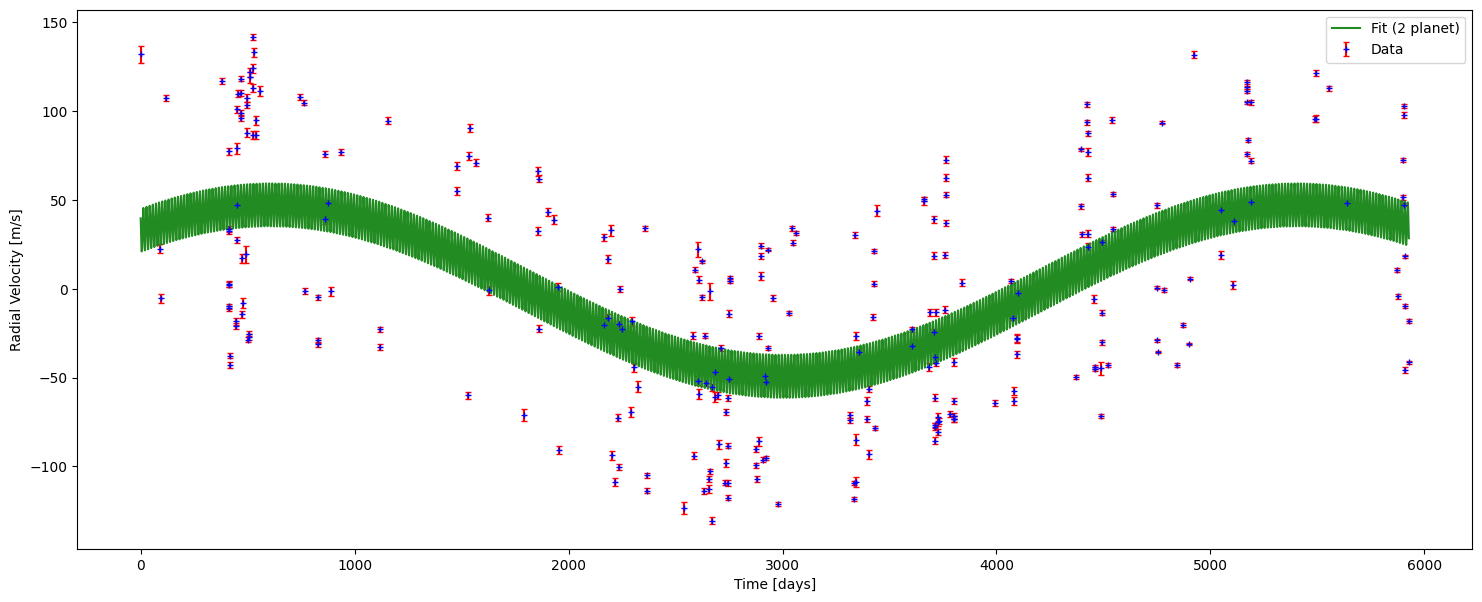

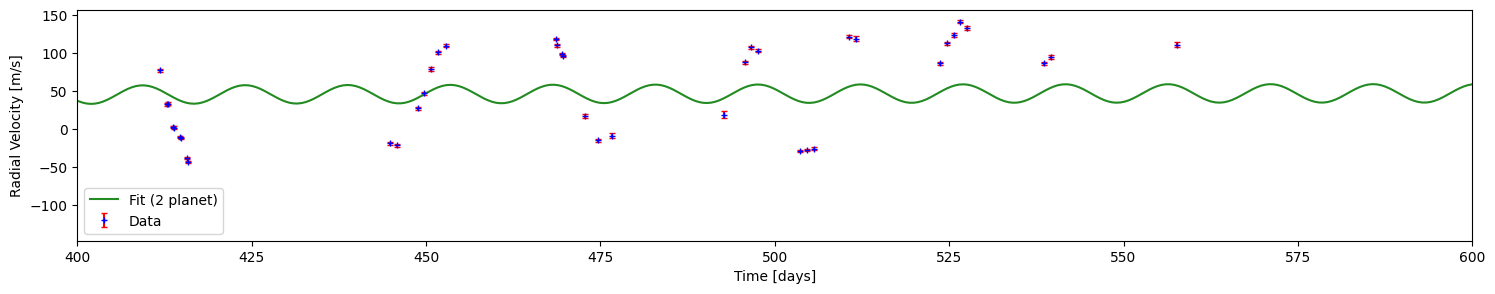

In [18]:
# plot data and 2 planet model
time_fit = np.linspace(np.min(time),np.max(time),10000)
rv_fit = rv_model2(time_fit,*params2)

fig,ax = plt.subplots(figsize=(18,7))

ax.errorbar(time,rv,rv_err,label="Data",
            ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')
ax.plot(time_fit,rv_fit,label="Fit (2 planet)",c="forestgreen")

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity [m/s]")
plt.legend()

plt.show()

# make a 2nd version zoomed in on the 400-600 region
fig,ax = plt.subplots(figsize=(18,3))

ax.errorbar(time,rv,rv_err,label="Data",
            ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')
ax.plot(time_fit,rv_fit,label="Fit (2 planet)",c="forestgreen")

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity [m/s]")
plt.xlim(400,600)
plt.legend()

plt.show()

This fit clearly didn't work well because the model does not match the data (without even looking at the residuals). The amplitude A2 is too low, we need to push that up. 

### 2-planets fit: attempt 2

The initial guesses are as good as they can be, but we need to refine the boundaries a bit. I will let the uncertainty on amplitude to be $\pm20\%$ of the initial guess, and $\pm1\%$ for the period and "start time". This is just one educated guess, but you can also do simple trial and error until it works.

In [19]:
# make some initial guesses
# first planet
A1 = params1[1]
P1 = params1[2]
T1 = params1[3]
offset = params1[0]

# second planet
A2 = params1_slice[1]
P2 = params1_slice[2]
T2 = params1_slice[3]

#array containing initial guesses
p_in = np.asarray([offset,A1,P1,T1,A2,P2,T2])

# set upper and lower boundaries on the search
lower = np.array([-50,  1,3000,3000,
                  params1_slice[1]*(1 - 20/100),
                  params1_slice[2]*(1 - 1/100),
                  params1_slice[3]*(1 - 1/100)])
upper = np.array([ 50,500,5000,5000,
                  params1_slice[1]*(1 + 20/100),
                  params1_slice[2]*(1 + 1/100),
                  params1_slice[3]*(1 + 1/100)])

#perform the fit
params2, params_cov2 = optimize.curve_fit(rv_model2,time,rv,sigma=rv_err,p0=p_in,bounds=(lower,upper),maxfev=100000)

#get parameters uncertainty
param_err2 = np.sqrt(np.diag(params_cov2))

print(f"Offset : {params2[0]:.2f} ft (+/- {param_err2[0]:.5f})")
print()
print(f"Amplitude A1: {params2[1]:.2f} m/s (+/- {param_err2[1]:.5f})")
print(f"Period P1: {params2[2]:.2f} days (+/- {param_err2[2]:.5f})")
print(f"T conj T1: {params2[3]:.2f} days (+/- {param_err2[3]:.5f})")
print()
print(f"Amplitude A2: {params2[4]:.2f} m/s (+/- {param_err2[4]:.5f})")
print(f"Period P2: {params2[5]:.2f} days (+/- {param_err2[5]:.5f})")
print(f"T conj T2: {params2[6]:.2f} days (+/- {param_err2[6]:.5f})")

Offset : 0.60 ft (+/- 4.00592)

Amplitude A1: 48.95 m/s (+/- 5.26785)
Period P1: 4514.14 days (+/- 301.72718)
T conj T1: 4171.08 days (+/- 97.96030)

Amplitude A2: 60.48 m/s (+/- 5.46444)
Period P2: 14.70 days (+/- 0.00199)
T conj T2: 451.04 days (+/- 0.44996)


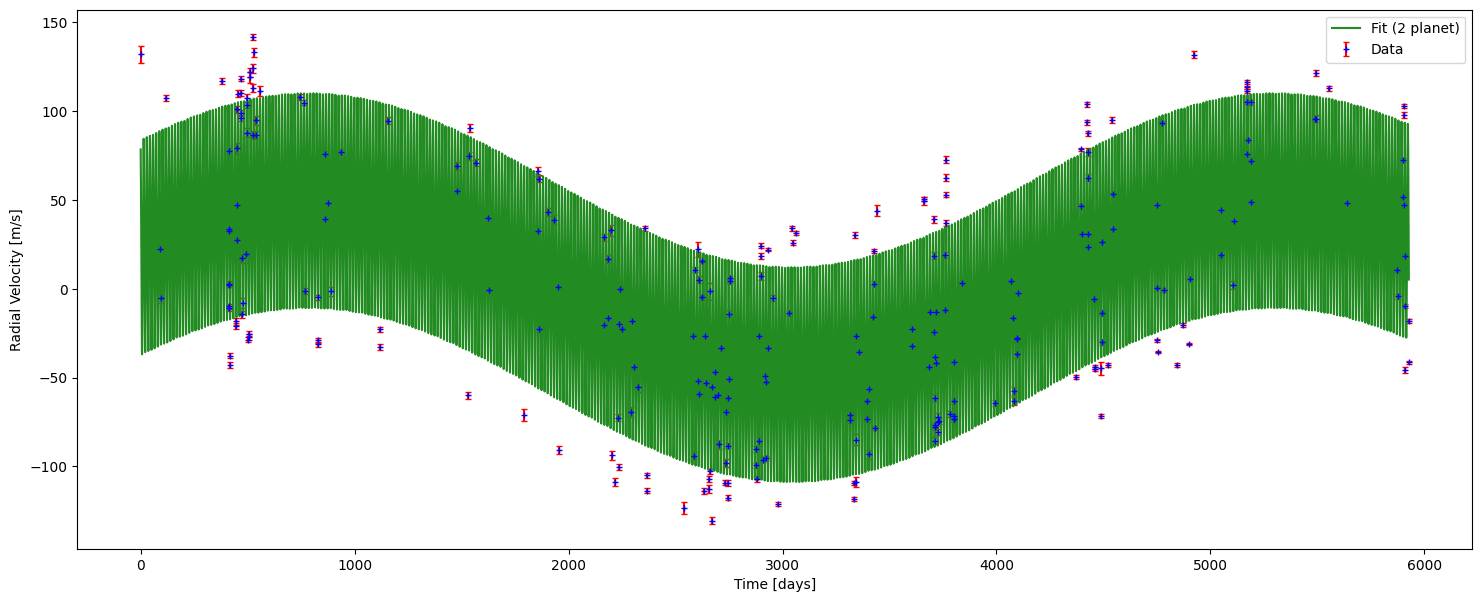

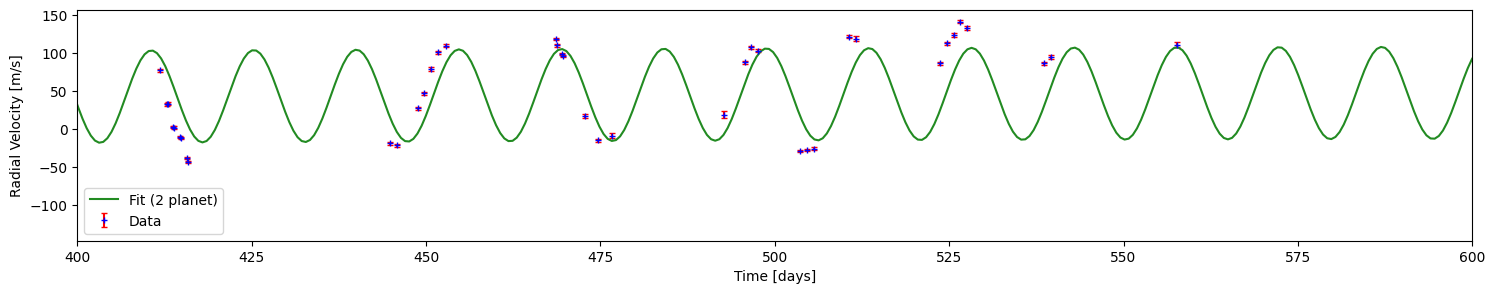

In [20]:
# plot data and 2 planet model
time_fit = np.linspace(np.min(time),np.max(time),10000)
rv_fit = rv_model2(time_fit,*params2)

fig,ax = plt.subplots(figsize=(18,7))

ax.errorbar(time,rv,rv_err,label="Data",
            ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')
ax.plot(time_fit,rv_fit,label="Fit (2 planet)",c="forestgreen")

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity [m/s]")
plt.legend()

plt.show()

# make a 2nd version zoomed in on the 400-600 region
fig,ax = plt.subplots(figsize=(18,3))

ax.errorbar(time,rv,rv_err,label="Data",
            ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')
ax.plot(time_fit,rv_fit,label="Fit (2 planet)",c="forestgreen")

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity [m/s]")
plt.xlim(400,600)
plt.legend()

plt.show()

I'm not fully convinced by that, because the model still doesn't go through the points. What can the residuals tell us?

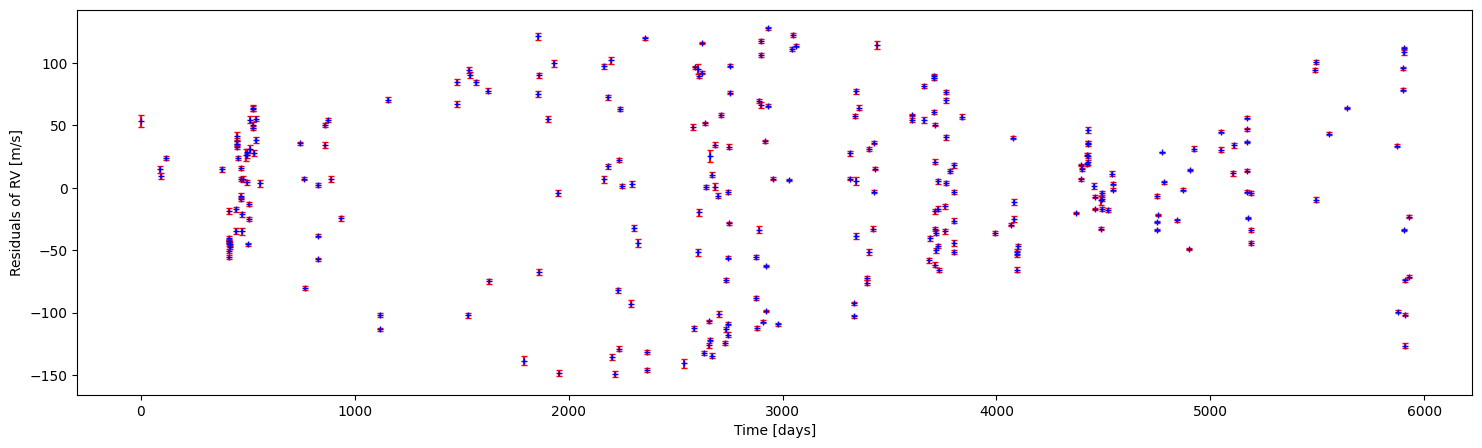

In [21]:
# evaluate the model at the measurement times
rv_model_points = rv_model2(time,*params2)

# get the residuals
residuals2 = rv - rv_model_points

#plot the residuals
fig,ax = plt.subplots(figsize=(18,5))

plt.errorbar(time,residuals2,rv_err,
             ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')

plt.xlabel("Time [days]")
plt.ylabel("Residuals of RV [m/s]")

plt.show()

The residuals are kind of low around 500 days and around 4500 days, but they are hella big between 2000 and 3000 days. This means the fit still didn't work. 

### 2-planets fit: attempt 3

This time, the "start time" of the 2nd planet (T2) seem too high. Let's decrease it a little in the initial guess (another method that works is lowering the upper boundary on T2).

In [22]:
# make some initial guesses
# first planet
A1 = params1[1]
P1 = params1[2]
T1 = params1[3]
offset = params1[0]

# second planet
A2 = params1_slice[1]
P2 = params1_slice[2]
T2 = params1_slice[3]*0.99

#array containing initial guesses
p_in = np.asarray([offset,A1,P1,T1,A2,P2,T2])

# set upper and lower boundaries on the search
lower = np.array([-50,  1,3000,3000,
                  params1_slice[1]*(1 - 20/100),
                  params1_slice[2]*(1 - 1/100),
                  params1_slice[3]*(1 - 1/100)])
upper = np.array([ 50,500,5000,5000,
                  params1_slice[1]*(1 + 20/100),
                  params1_slice[2]*(1 + 1/100),
                  params1_slice[3]*(1 + 1/100)])

#perform the fit
params2, params_cov2 = optimize.curve_fit(rv_model2,time,rv,sigma=rv_err,p0=p_in,bounds=(lower,upper),maxfev=100000)

#get parameters uncertainty
param_err2 = np.sqrt(np.diag(params_cov2))

print(f"Offset : {params2[0]:.2f} ft (+/- {param_err2[0]:.5f})")
print()
print(f"Amplitude A1: {params2[1]:.2f} m/s (+/- {param_err2[1]:.5f})")
print(f"Period P1: {params2[2]:.2f} days (+/- {param_err2[2]:.5f})")
print(f"T conj T1: {params2[3]:.2f} days (+/- {param_err2[3]:.5f})")
print()
print(f"Amplitude A2: {params2[4]:.2f} m/s (+/- {param_err2[4]:.5f})")
print(f"Period P2: {params2[5]:.2f} days (+/- {param_err2[5]:.5f})")
print(f"T conj T2: {params2[6]:.2f} days (+/- {param_err2[6]:.5f})")

Offset : 0.03 ft (+/- 0.73006)

Amplitude A1: 44.26 m/s (+/- 0.86118)
Period P1: 4847.58 days (+/- 76.81397)
T conj T1: 4043.53 days (+/- 21.08926)

Amplitude A2: 72.50 m/s (+/- 0.95466)
Period P2: 14.65 days (+/- 0.00030)
T conj T2: 449.56 days (+/- 0.07140)


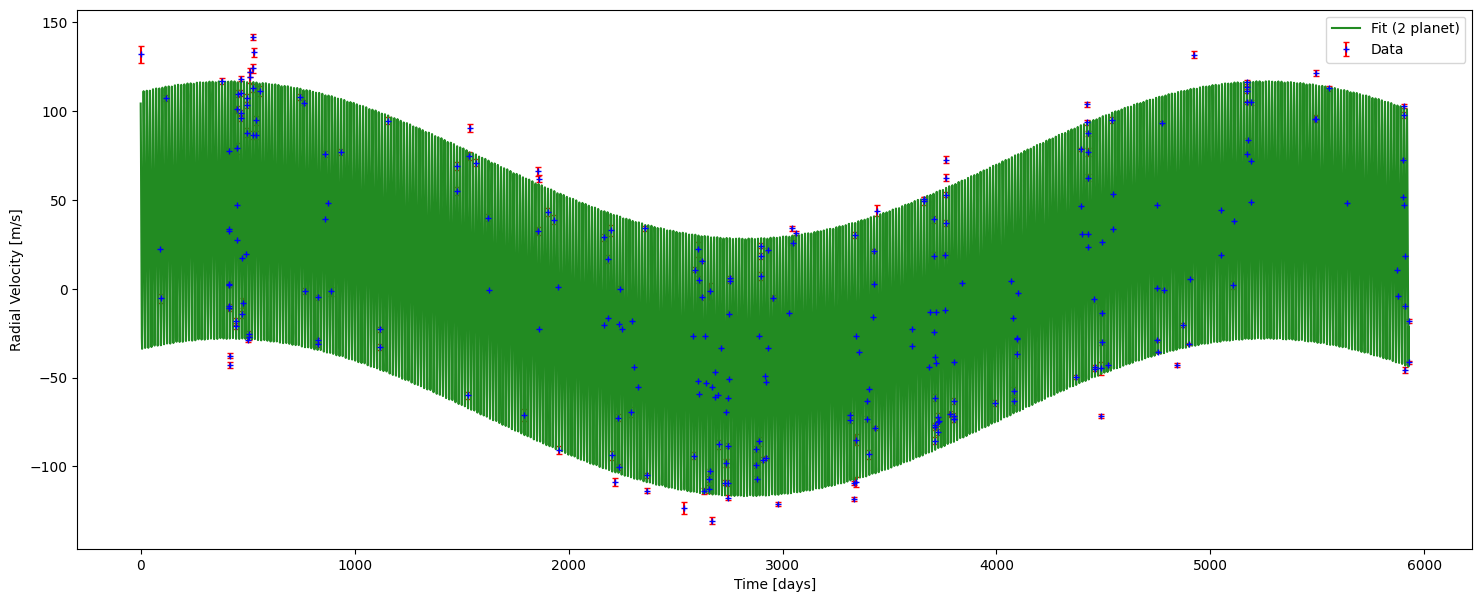

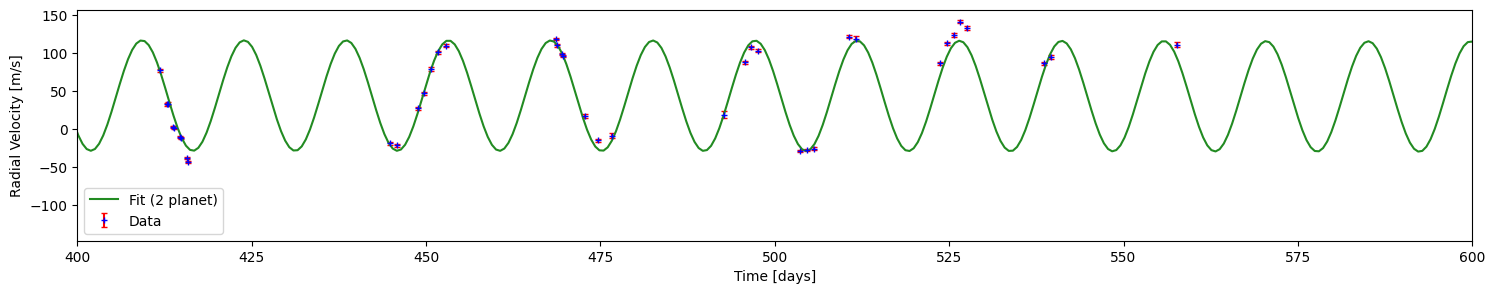

In [23]:
# plot data and 2 planet model
time_fit = np.linspace(np.min(time),np.max(time),10000)
rv_fit = rv_model2(time_fit,*params2)

fig,ax = plt.subplots(figsize=(18,7))

ax.errorbar(time,rv,rv_err,label="Data",
            ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')
ax.plot(time_fit,rv_fit,label="Fit (2 planet)",c="forestgreen")

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity [m/s]")
plt.legend()

plt.show()

# make a 2nd version zoomed in on the 400-600 region
fig,ax = plt.subplots(figsize=(18,3))

ax.errorbar(time,rv,rv_err,label="Data",
            ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')
ax.plot(time_fit,rv_fit,label="Fit (2 planet)",c="forestgreen")

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity [m/s]")
plt.xlim(400,600)
plt.legend()

plt.show()

Looks like it worked. Let's check the residuals.

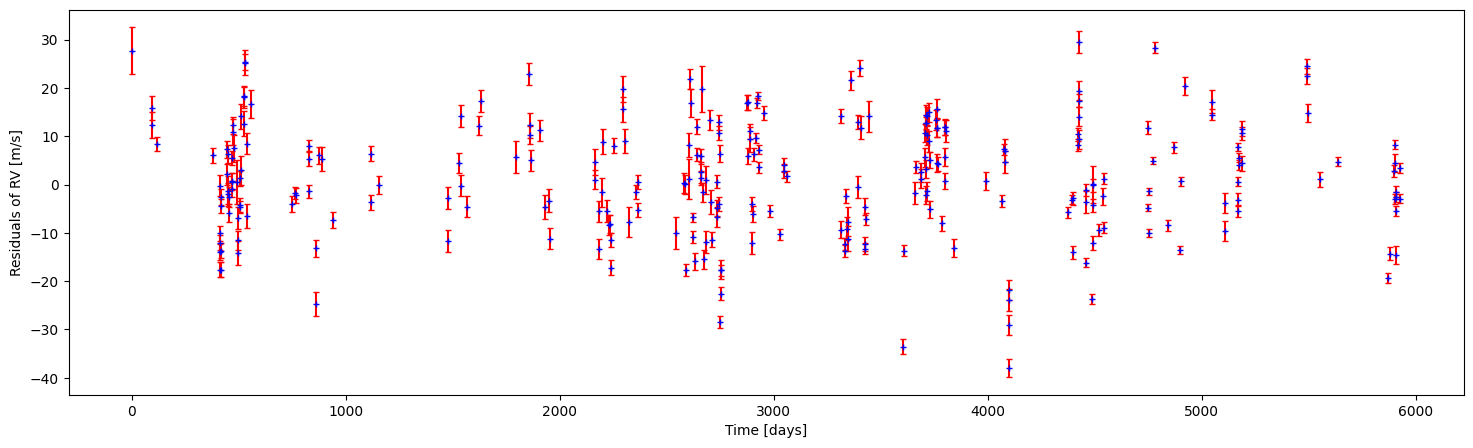

In [24]:
# evaluate the model at the measurement times
rv_model_points = rv_model2(time,*params2)

# get the residuals
residuals2 = rv - rv_model_points

#plot the residuals
fig,ax = plt.subplots(figsize=(18,5))

plt.errorbar(time,residuals2,rv_err,
             ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')

plt.xlabel("Time [days]")
plt.ylabel("Residuals of RV [m/s]")

plt.show()

In [25]:
print(f"Data stdev: {np.std(rv):.6f}")
print(f"Data uncertainty: {np.mean(rv_err):.6f}")
print(f"Residuals 1 stdev/rms: {np.std(residuals1):.6f}")
print(f"Residuals 2 stdev/rms: {np.std(residuals2):.6f}")

Data stdev: 67.066162
Data uncertainty: 1.806067
Residuals 1 stdev/rms: 52.212070
Residuals 2 stdev/rms: 11.639605


Wow, this is so much better!!! We finally managed to properly do the 2-planet fit!!! That being said, the residuals are still larger than the uncertainty (the residuals are 10 times larger than the error bars), meaning that we can do better.

At this point, it is important to remind ourselves that a fit only works when the three conditions below are satisfied (these conditions are equivalent):
- the model visually reproduces the data (first assessment)
- residuals are close to 0 on average (checking for outliers)
- the scatter (stdev) of residuals is lower than that of the data (quantitative argument)

If this is not the case, you need to go back and improve your fit by changing the initial guess or the boundaries.

## Finding the 3rd planet

Let's look at the slice of points around 500 days again.

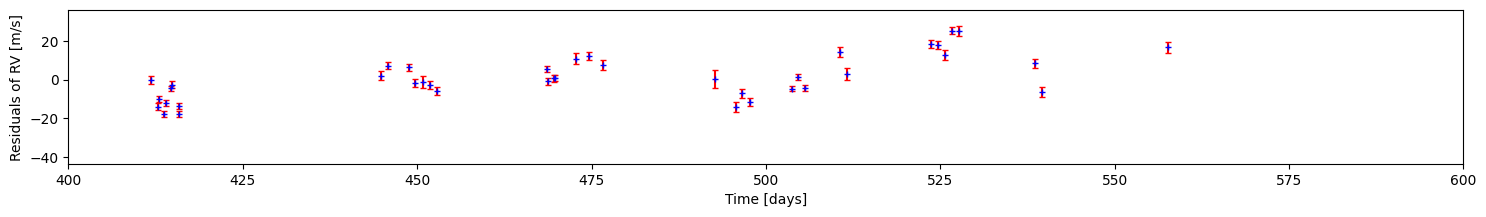

In [26]:
# plot the residuals, but zoom in from 400 to 600 days
fig,ax = plt.subplots(figsize=(18,2))

plt.errorbar(time,residuals2,rv_err,
             ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')

plt.xlabel("Time [days]")
plt.ylabel("Residuals of RV [m/s]")
plt.xlim(400,600)

plt.show()

It is definitely not obvious to see a sine wave in that data, but we see some scatter, which means that there is potentially some information we can get there. Let's slice our data like before and do a simple 1-planet fit to this region.

We already sliced this data, so we simply apply a 1-planet fit to 'residuals2' instead of 'residuals1'.

In [27]:
# make a mask that only keeps points between 400 and 600 days
# already done
mask_400_to_600 = (time>400) & (time<600)

# take a slice corresponding to that mask
rv_slice2 = residuals2[mask_400_to_600]

In [28]:
# initial guesses
A1_slice2 = 10.0
P1_slice2 = 40.0
T1_slice2 = 440.0 
offset_slice2 = 0

# array containing initial guesses
p_init_slice2 = np.asarray([offset_slice2,A1_slice2,P1_slice2,T1_slice2])

# set upper and lower boundaries on the search
lower_slice2 = np.array([-50,  1, 10,400])
upper_slice2 = np.array([ 50,500,100,500])

# perform the fit with 1 planet
params1_slice2, params_cov1_slice2 = optimize.curve_fit(rv_model1,time_slice,rv_slice2,sigma=rv_err_slice,p0=p_init_slice2,bounds=(lower_slice2,upper_slice2),maxfev=100000)

# get parameters uncertainty
param_err1_slice2 = np.sqrt(np.diag(params_cov1_slice2))

# print results
print(f"Offset : {params1_slice2[0]:.2f} ft (+/- {param_err1_slice2[0]:.5f})")
print()
print(f"Amplitude A1: {params1_slice2[1]:.2f} m/s (+/- {param_err1_slice2[1]:.5f})")
print(f"Period P1: {params1_slice2[2]:.2f} days (+/- {param_err1_slice2[2]:.5f})")
print(f"T conj T1: {params1_slice2[3]:.2f} days (+/- {param_err1_slice2[3]:.5f})")

Offset : 4.55 ft (+/- 1.10166)

Amplitude A1: 13.86 m/s (+/- 1.46708)
Period P1: 43.12 days (+/- 1.07271)
T conj T1: 426.09 days (+/- 1.42348)


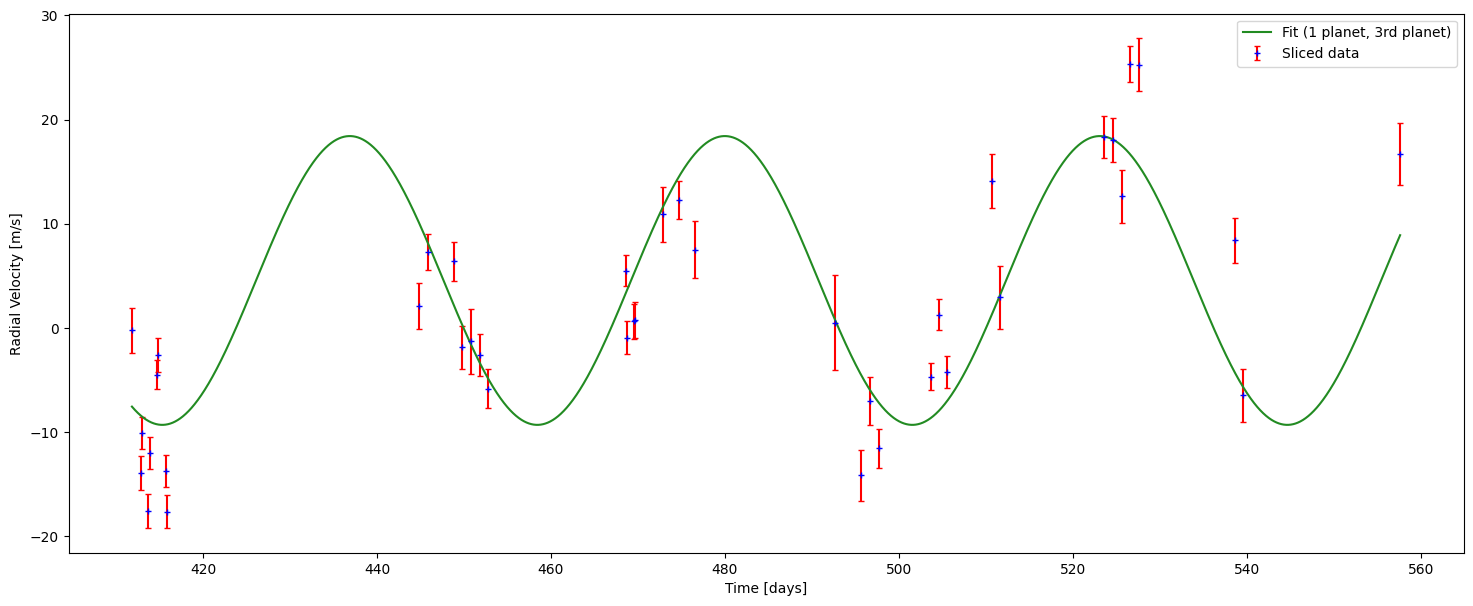

In [29]:
# plot slice of data and 1 planet model applied to the 2nd planet
time_fit = np.linspace(np.min(time_slice),np.max(time_slice),10000)
rv_fit = rv_model1(time_fit,*params1_slice2)

fig,ax = plt.subplots(figsize=(18,7))

ax.errorbar(time_slice,rv_slice2,rv_err_slice,label="Sliced data",
            ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')
ax.plot(time_fit,rv_fit,label="Fit (1 planet, 3rd planet)",c="forestgreen")

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity [m/s]")
plt.legend()

plt.show()

This data is clearly a sine wave that seems to correspond to the 3rd planet.

### 3-planets fit

Let's do the 3-planets fit using the same methodology as before. This time, we use parameters from the 2-planets fit as initial guess, and the 2nd sliced fit.

In [30]:
def rv_model3(time, offset, A1, P1, T1, A2, P2, T2, A3, P3, T3):
    rv = A1*np.sin(2.0*np.pi*(time-T1)/P1) +\
         A2*np.sin(2.0*np.pi*(time-T2)/P2) +\
         A3*np.sin(2.0*np.pi*(time-T3)/P3) + offset
    return rv 

In [31]:
# make some initial guesses
# first planet
A1 = params2[1]
P1 = params2[2]
T1 = params2[3]
offset = params2[0]

# second planet
A2 = params2[4]
P2 = params2[5]
T2 = params2[6]

# third planet
A3 = params1_slice2[1]
P3 = params1_slice2[2]*1.02
T3 = params1_slice2[3]

#array containing initial guesses
p_in = np.asarray([offset,A1,P1,T1,A2,P2,T2,A3,P3,T3])

# set upper and lower boundaries on the search
lower = np.array([-50,  1,3000,3000, 
                  params2[4]*(1 - 5/100),
                  params2[5]*(1 - 5/100),
                  params2[6]*(1 - 5/100),
                  params1_slice2[1]*(1 - 90/100),
                  params1_slice2[2]*(1 - 50/100),
                  params1_slice2[3]*(1 - 50/100)])
upper = np.array([ 50,500,6000,5000,
                  params2[4]*(1 + 5/100),
                  params2[5]*(1 + 5/100),
                  params2[6]*(1 + 5/100),
                  params1_slice2[1]*(1 + 90/100),
                  params1_slice2[2]*(1 + 50/100),
                  params1_slice2[3]*(1 + 50/100)])

#perform the fit
params3, params_cov3 = optimize.curve_fit(rv_model3,time,rv,sigma=rv_err,p0=p_in,bounds=(lower,upper),maxfev=100000)

#get parameters uncertainty
param_err3 = np.sqrt(np.diag(params_cov3))

print(f"Offset : {params3[0]:.2f} ft (+/- {param_err3[0]:.5f})")
print()
print(f"Amplitude A1: {params3[1]:.2f} m/s (+/- {param_err3[1]:.5f})")
print(f"Period P1: {params3[2]:.2f} days (+/- {param_err3[2]:.5f})")
print(f"T conj T1: {params3[3]:.2f} days (+/- {param_err3[3]:.5f})")
print()
print(f"Amplitude A2: {params3[4]:.2f} m/s (+/- {param_err3[4]:.5f})")
print(f"Period P2: {params3[5]:.2f} days (+/- {param_err3[5]:.5f})")
print(f"T conj T2: {params3[6]:.2f} days (+/- {param_err3[6]:.5f})")
print()
print(f"Amplitude A3: {params3[7]:.2f} m/s (+/- {param_err3[7]:.5f})")
print(f"Period P3: {params3[8]:.2f} days (+/- {param_err3[8]:.5f})")
print(f"T conj T3: {params3[9]:.2f} days (+/- {param_err3[9]:.5f})")

Offset : 0.34 ft (+/- 0.52640)

Amplitude A1: 45.18 m/s (+/- 0.62668)
Period P1: 4847.55 days (+/- 55.01172)
T conj T1: 4063.81 days (+/- 15.04545)

Amplitude A2: 72.51 m/s (+/- 0.68335)
Period P2: 14.65 days (+/- 0.00021)
T conj T2: 449.65 days (+/- 0.05125)

Amplitude A3: 11.82 m/s (+/- 0.73819)
Period P3: 44.37 days (+/- 0.01097)
T conj T3: 379.43 days (+/- 0.90646)


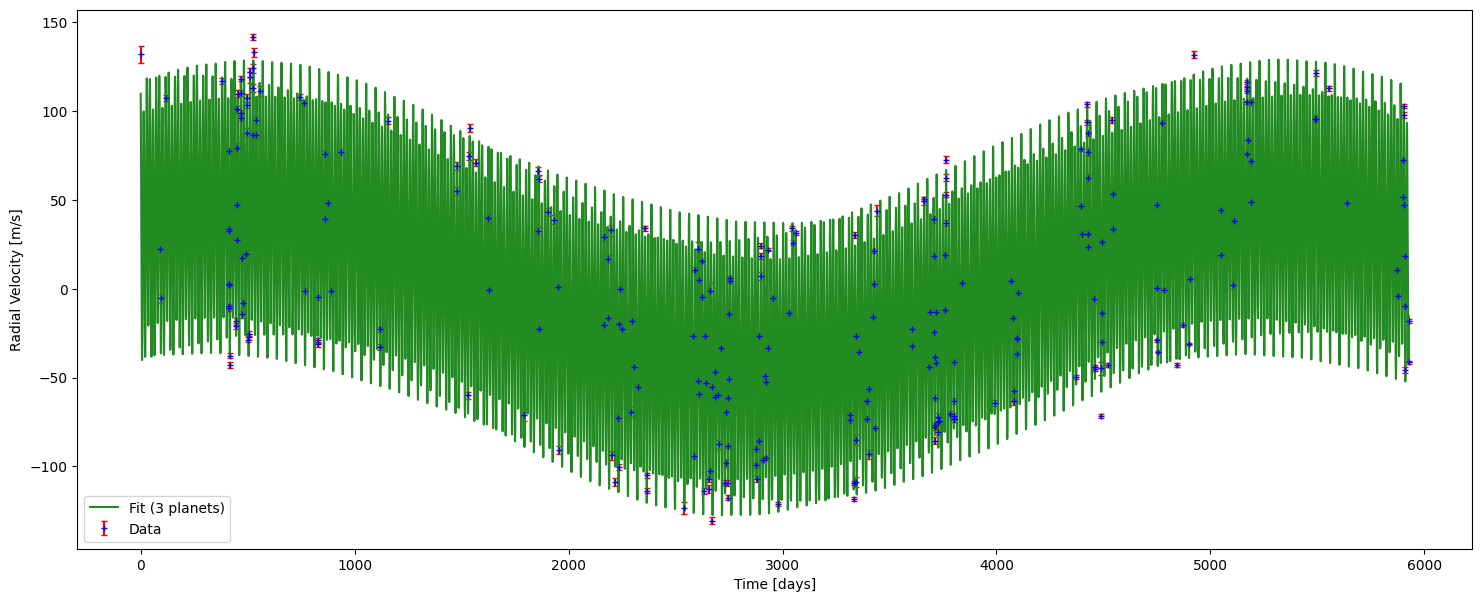

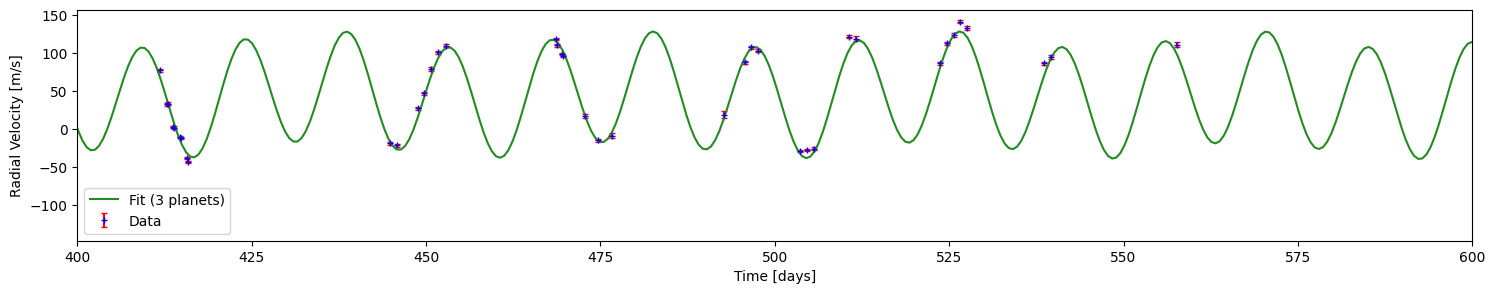

In [32]:
# plot data and 2 planet model
time_fit = np.linspace(np.min(time),np.max(time),10000)
rv_fit = rv_model3(time_fit,*params3)

fig,ax = plt.subplots(figsize=(18,7))

ax.errorbar(time,rv,rv_err,label="Data",
            ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')
ax.plot(time_fit,rv_fit,label="Fit (3 planets)",c="forestgreen")

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity [m/s]")
plt.legend()

plt.show()

# make a 2nd version zoomed in on the 400-600 region
fig,ax = plt.subplots(figsize=(18,3))

ax.errorbar(time,rv,rv_err,label="Data",
            ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')
ax.plot(time_fit,rv_fit,label="Fit (3 planets)",c="forestgreen")

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity [m/s]")
plt.xlim(400,600)
plt.legend()

plt.show()

Now for the residuals...

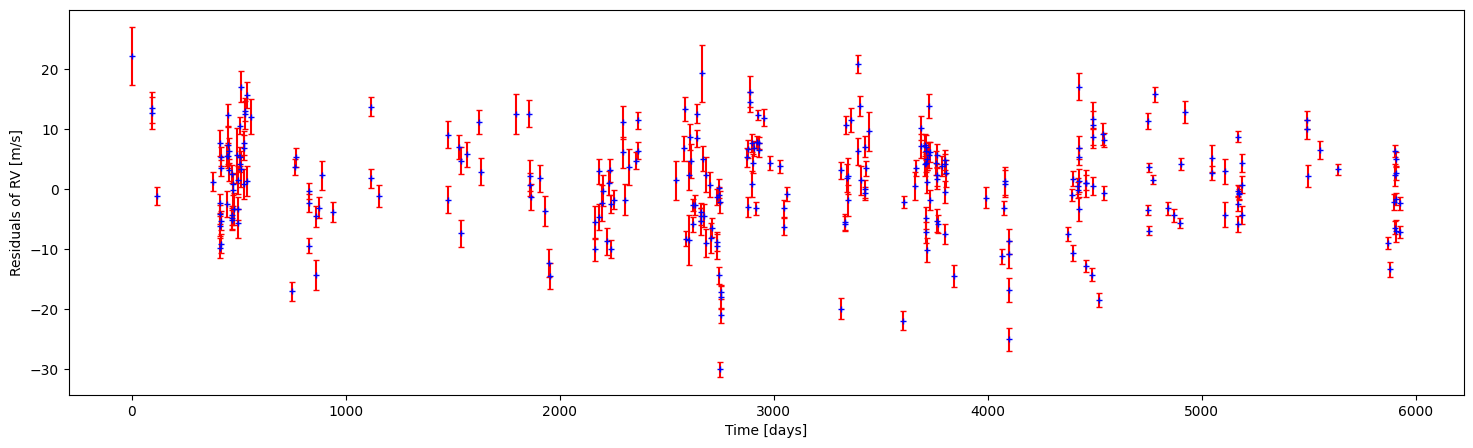

In [33]:
# evaluate the model at the measurement times
rv_model_points = rv_model3(time,*params3)

# get the residuals
residuals3 = rv - rv_model_points

#plot the residuals
fig,ax = plt.subplots(figsize=(18,5))

plt.errorbar(time,residuals3,rv_err,
             ls='',marker='+',markersize=5,capsize=2,color='blue',ecolor='red')

plt.xlabel("Time [days]")
plt.ylabel("Residuals of RV [m/s]")

plt.show()

In [34]:
print(f"Data stdev: {np.std(rv):.6f}")
print(f"Data uncertainty: {np.mean(rv_err):.6f}")
print(f"Residuals 1 stdev/rms: {np.std(residuals1):.6f}")
print(f"Residuals 2 stdev/rms: {np.std(residuals2):.6f}")
print(f"Residuals 3 stdev/rms: {np.std(residuals3):.6f}")

Data stdev: 67.066162
Data uncertainty: 1.806067
Residuals 1 stdev/rms: 52.212070
Residuals 2 stdev/rms: 11.639605
Residuals 3 stdev/rms: 8.227971


It's not an incredible improvement, but we managed to reduce the stdev of residuals by twice the value of the uncertainty. This is a 2-sigma improvement, meaning that it could be noise, but could also be real!

Let's show how all the histograms of residuals look when we include more and more planets.

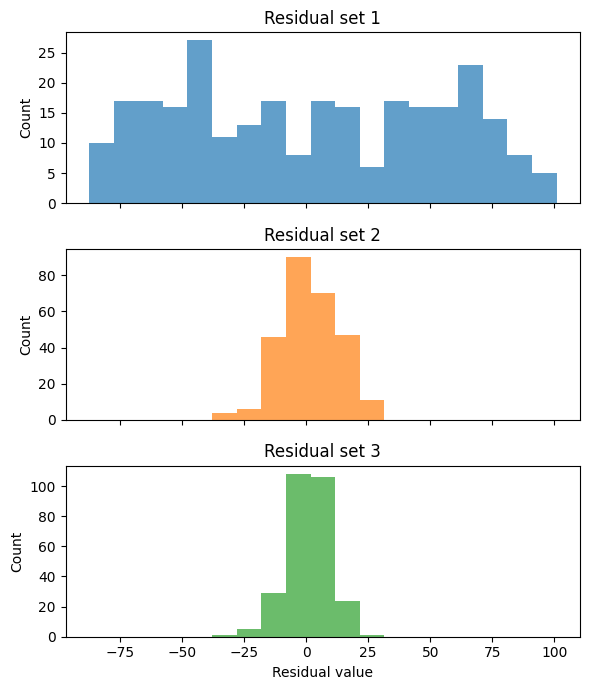

In [35]:
bins = np.linspace(
        min(residuals1.min(), residuals2.min(), residuals3.min()),
        max(residuals1.max(), residuals2.max(), residuals3.max()),
        20)                     # 40 bins; adjust as you like

fig, axes = plt.subplots(
        nrows=3,         # three rows
        ncols=1,
        sharex=True,     # same x‑axis across rows
        figsize=(6, 7))

axes[0].hist(residuals1, bins=bins, color='tab:blue',  alpha=0.7, density=False)
axes[1].hist(residuals2, bins=bins, color='tab:orange',alpha=0.7, density=False)
axes[2].hist(residuals3, bins=bins, color='tab:green', alpha=0.7, density=False)

axes[0].set_title('Residual set 1')
axes[1].set_title('Residual set 2')
axes[2].set_title('Residual set 3')

axes[2].set_xlabel('Residual value')
for ax in axes:
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Calculating the mass of exoplanets

The last step is to calculate the mass of the discovered exoplanets using the formula: $$M_{\mathrm{exoplanet}} = \left(\frac{K}{28.4 ~\text{m/s}}\right) \left(\frac{P}{365~\text{days}}\right)^{1/3} \left(M_{\star}\right)^{2/3},$$
where the mass of the star 55 Cnc is $M_{\star}=0.905$ times the mass of the Sun, according to the exoplanet archive. The amplitude is already in m/s, and the period is already in days.

In [36]:
mass_star = 0.905
offset,A1,P1,T1,A2,P2,T2,A3,P3,T3 = params3

mass1 = (A1/28.4) * (P1/365)**(1/3) * mass_star**(2/3)
mass2 = (A2/28.4) * (P2/365)**(1/3) * mass_star**(2/3)
mass3 = (A3/28.4) * (P3/365)**(1/3) * mass_star**(2/3)

print(f"Planet 1 has an RV amplitude of {A1:.1f} m/s and a period "+
      f"of {P1:.2f} days,\ncorresponding to a mass of {mass1:.4f} times" + 
      f" the mass of Jupiter.\nAccording to the exoplanet archive, Planet 1 is 55 Cnc d.")
print()
print(f"Planet 2 has an RV amplitude of {A2:.1f} m/s and a period "+
      f"of {P2:.2f} days,\ncorresponding to a mass of {mass2:.4f} times" + 
      f" the mass of Jupiter.\nAccording to the exoplanet archive, Planet 2 is 55 Cnc b.")
print()
print(f"Planet 1 has an RV amplitude of {A3:.1f} m/s and a period "+
      f"of {P3:.2f} days,\ncorresponding to a mass of {mass3:.4f} times" + 
      f" the mass of Jupiter.\nAccording to the exoplanet archive, Planet 3 is 55 Cnc c.")
print()
      

Planet 1 has an RV amplitude of 45.2 m/s and a period of 4847.55 days,
corresponding to a mass of 3.5251 times the mass of Jupiter.
According to the exoplanet archive, Planet 1 is 55 Cnc d.

Planet 2 has an RV amplitude of 72.5 m/s and a period of 14.65 days,
corresponding to a mass of 0.8179 times the mass of Jupiter.
According to the exoplanet archive, Planet 2 is 55 Cnc b.

Planet 1 has an RV amplitude of 11.8 m/s and a period of 44.37 days,
corresponding to a mass of 0.1929 times the mass of Jupiter.
According to the exoplanet archive, Planet 3 is 55 Cnc c.



## Conclusion and final remarks

In this notebook, we identified 3 exoplanets in the RV data consisting of 274 measurements by fitting sine waves to the data and extracting their properties. The stdev of residuals is used as a quantitative criterion to determine the progress in our analysis.

As seen in class, fitting a function to data doesn't always work from the first try, and some extra work with initial guess and boundaries is needed to help the curve_fit algorithm to converge. The final stdev of residuals is still greater than experimental uncertainty (by about a factor of 5), meaning that with more time (and more tries) it is possible to extract more planets from the data.

The purpose of this Group Project was to show how to analyze real data using tools learned in class, which is different from a "school setup" that would be designed to always give the same answer. Although frustrating on one end, this is also what makes scientific research so exciting: even when we think we are done, it is often possible to go further, and potentially discover something new. And this approach does not apply only to planetary science or academia, it generalises to the study of any data (games, sports, health, finance, etc.).